[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/S2Mostafa/AutoEncoderClass/blob/main/AutoEncoder_v1.ipynb)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)


Get MNIST Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Preprocess

In [3]:
# we will use train data for auto encoder training
display( x_train.shape)
x_train = x_train.reshape(60000, 784) # MNIST input 28 rows * 28 columns = 784 pixels
display( x_train.shape)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train =x_train/ gray_scale
x_test =x_test/ gray_scale

(60000, 28, 28)

(60000, 784)

In [4]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes)

Visualize Images

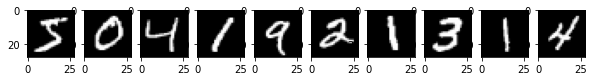

In [5]:
n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
plt.show()

Model

In [6]:
input_img_1 = Input(shape=(784,))
# encoder
encoder11 = Dense(128, activation='sigmoid')(input_img_1)
#encoder21 = Dense(3, activation='sigmoid')(encoder1)
# decoder
#decoder11 = Dense(128, activation='sigmoid')(encoder2)
#decoder21 = Dense(784, activation='sigmoid')(decoder1)
decoder21 = Dense(784, activation='sigmoid')(encoder11)
# this model maps an input to its reconstruction
autoencoder_1 = Model(inputs=input_img_1, outputs=decoder21)

In [7]:
autoencoder_1.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder_1.fit(x_train, x_train,
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1869 - val_loss: 0.1301
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1162 - val_loss: 0.0996
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0961 - val_loss: 0.0876
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0874 - val_loss: 0.0815
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0821 - val_loss: 0.0771


In [9]:
autoencoder_1.layers[1].trainable = False
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 101,136
Non-trainable params: 100,480
_________________________________________________________________


In [10]:
encoder11_F= Model(inputs=autoencoder_1.input, outputs=autoencoder_1.layers[-2].output)
encoder11_F.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
Total params: 100,480
Trainable params: 0
Non-trainable params: 100,480
_________________________________________________________________


In [11]:
encoder11_F.trainable = False
encoder11_F.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
Total params: 100,480
Trainable params: 0
Non-trainable params: 100,480
_________________________________________________________________


In [12]:
#encoder 2
encoder211 = Dense(3, activation='sigmoid')(encoder11_F.layers[-1].output)
# decoder
decoder111 = Dense(128, activation='sigmoid')(encoder211)
decoder211 = Dense(784, activation='sigmoid')(decoder111)


In [13]:
autoencoder_2 = Model(inputs=encoder11_F.inputs, outputs=decoder211)
autoencoder_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 784)               101136    
                                                                 
Total params: 202,515
Trainable params: 102,035
Non-trainable params: 100,480
_________________________________________________________________


In [14]:
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
autoencoder_2.fit(x_train, x_train,
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2594 - val_loss: 0.2323
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2368 - val_loss: 0.2149
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2193 - val_loss: 0.2052
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2125 - val_loss: 0.2003
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2083 - val_loss: 0.1977


In [16]:
# create encoder model
encoder = Model(inputs=autoencoder_2.inputs, outputs=autoencoder_2.layers[2].output)
# create decoder model
encoded_input = Input(shape=(3,))
decoder_layer111 = autoencoder_2.layers[-2]
decoder_layer211 = autoencoder_2.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer211(decoder_layer111(encoded_input)))

In [18]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

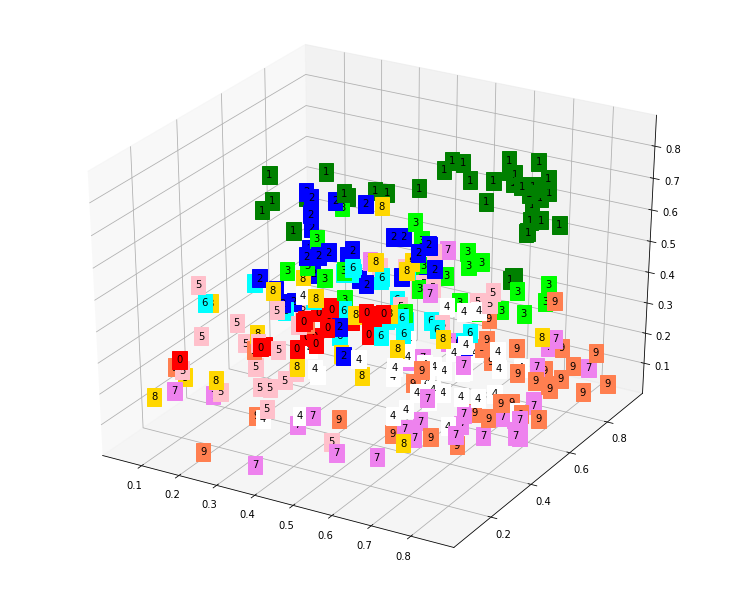

In [19]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

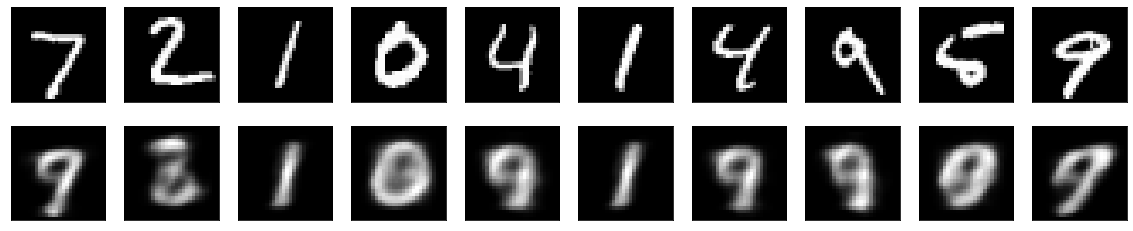

In [20]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Classification


In [21]:
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 100,867
Trainable params: 387
Non-trainable params: 100,480
_________________________________________________________________


In [22]:
encoder.layers[-1].trainable=False
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 100,867
Trainable params: 0
Non-trainable params: 100,867
_________________________________________________________________


In [23]:
num_classes=10
classLayer=Dense(50, activation='sigmoid')(encoder.layers[-1].output)
classifierOutput=(Dense(units=num_classes, activation='softmax'))(classLayer)

In [24]:
classificationModel=Model(inputs=encoder.inputs,outputs=classifierOutput)
classificationModel.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
 dense_5 (Dense)             (None, 50)                200       
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 101,577
Trainable params: 710
Non-trainable params: 100,867
_________________________________________________________________


In [25]:
classificationModel.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
classificationModel.fit(x_train, y_train, batch_size=64, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
844/844 [==============================] - 3s 3ms/step - loss: 0.3382 - val_loss: 0.3100
Epoch 2/5
844/844 [==============================] - 3s 3ms/step - loss: 0.2924 - val_loss: 0.2712
Epoch 3/5
844/844 [==============================] - 3s 3ms/step - loss: 0.2587 - val_loss: 0.2466
Epoch 4/5
844/844 [==============================] - 3s 3ms/step - loss: 0.2441 - val_loss: 0.2380
Epoch 5/5
844/844 [==============================] - 3s 3ms/step - loss: 0.2381 - val_loss: 0.2331


In [27]:
testOut=np.argmax(classificationModel.predict(x_test),axis=-1)[:10]
testOut

array([7, 2, 1, 0, 4, 1, 9, 9, 0, 7])

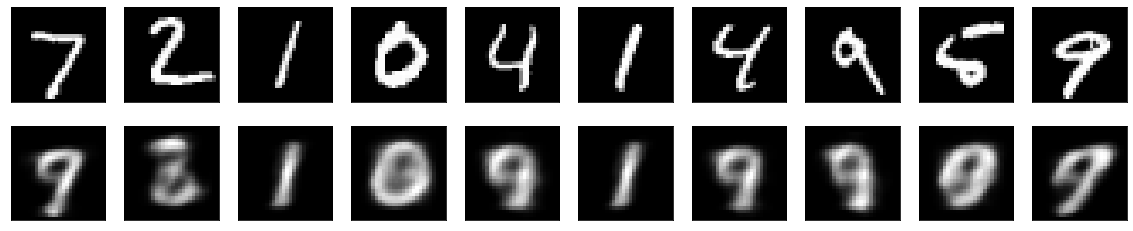

In [28]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [29]:
print(y_test[:10])
print(testOut)

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 9 9 0 7]
